### Introduction
Consider to solve 1D wave equation in the domain of $(0 \leq x \leq L)\times(0 \leq t \leq T)$ with various material propeties:
$$ \rho(x) \frac{\partial {^2 u(x,t)}}{\partial{t^2}} = \frac{\partial}{\partial x} \left[E(x) \frac{\partial {u(x,t)}}{\partial{x}} \right] $$

where $\rho(x), E(x)$ are the density and Young's Modulus. <br/>
Free boundary condition at $x=0$:
$$\frac{\partial }{\partial x} u(x=0, t) = 0$$
Absorbing boundary condition at at $x=L$: 
$$c\frac{\partial}{\partial x}u(x=L, t) + \frac{\partial}{\partial t}u(x=L, t) = 0$$
Initial conditions at $t=0$:
$$u(x, t=0) = 0, \frac{\partial{u(x, t=0)}}{\partial{t}} = 0$$
Forced vibration at $x\in[x_f, x_f+h_p]$: $T(x, t) = E(x)S(x, t) - e_{33} \mathscr{E}(x,t)$, combined with $\partial T(x) / \partial x = \rho(x) \partial {^2 u(x,t)} / \partial{t^2}$ produces

$$\rho(x) \frac{\partial {^2 u(x,t)}}{\partial{t^2}} = \frac{\partial}{\partial x} \left[E(x) \frac{\partial {u(x,t)}}{\partial{x}} \right] - e_{33} \frac{\partial \mathscr{E}(x,t)}{\partial x} $$

Observed signal is the open-circuit voltage difference between $x=x_f$ and $x=x_f$: $V_{oc}(t) = - \int_{x_f}^{x_f+h_p} E(x,t) dx$

Note that for open-circuit sensing: <br/>
$D_{33}(x,t) = e_{33}S(x,t) + \epsilon_{33} \mathscr{E}(x,t) = 0$ <br/>
$\rightarrow \mathscr{E}(x,t) = -e_{33}S(x,t) / \epsilon_{33} $ <br/>
$ \rightarrow V_{oc}(t) = \int_{x_f}^{x_f+h_p}e_{33}S(x,t) / \epsilon_{33}dx = e_{33}[u(x_f+h_p,t)-u(x_f,t)] / \epsilon_{33}$. <br/>
Considering loading capacitor, the actual voltage is scaled by $\eta<1$:
$$V_{oc}(t) = \frac{\eta e_{33}} {\epsilon_{33}} [u(x_f+h_p,t)-u(x_f,t)]$$

### Finite Difference
Now descretize both space and time with step of $\Delta x$ and $\Delta t$, respectively. Then the second-order derivatives can be replaced by central differences:
$$\frac{\partial ^2}{\partial t^2}u(x_m,t_n) \approx \frac{u^{n-1}_m - 2u^{n}_m + u^{n+1}_m}{\Delta t^2}$$
$$\frac{\partial ^2}{\partial x^2}u(x_m,t_n) \approx \frac{u^n_{m-1} - 2u^{n}_m + u^n_{m+1}}{\Delta x^2}$$
$$\frac{\partial}{\partial x}u(x_m,t_n) \approx \frac{-u^n_{m-1} + u^n_{m+1}}{2\Delta x}$$
where $m=1,2,...,M-1, n=2,...,N$. Note that:
$$ \frac{\partial}{\partial x} \left[E(x) \frac{\partial {u(x,t)}}{\partial{x}} \right] = E(x)\frac{\partial ^2 u(x,t)}{\partial x^2} + \frac{\partial E(x)}{\partial x} \frac{\partial {u(x,t)}}{\partial{x}}$$
The wave equation becomes:
$$\rho_m\frac{u^{n-1}_m - 2u^{n}_m + u^{n+1}_m}{\Delta t^2} = E(x_m)\frac{u^n_{m-1} - 2u^{n}_m + u^n_{m+1}}{\Delta x^2} + \frac{-E_{m-1} + E_{m+1}}{2\Delta x} \frac{-u^n_{m-1} + u^n_{m+1}}{2\Delta x}$$

Which produces with $c_m=\sqrt{E_m/\rho_m}, c_{m-1}c_m \approx E_{m-1}/\rho_m, c_{m}c_{m+1} \approx E_{m+1}/\rho_m,r_m=c_m(\Delta t/\Delta x)$:

$$u^{n+1}_m = \left(r^2_m - \frac{-r_{m-1}r_m + r_{m}r_{m+1}}{4}\right) u^n_{m-1} + (2-2r^2_m)u^n_m + \left(r^2_m + \frac{-r_{m-1}r_m + r_{m}r_{m+1}}{4}\right) u^n_{m+1} - u^{n-1}_m$$

Now substitue the first-oder derivatives with difference:
$$\frac{\partial}{\partial t}u(x_m,t_n) \approx \frac{-u^{n}_m + u^{n+1}_m}{\Delta t} $$
$$\frac{\partial}{\partial x}u(x_m,t_n) \approx \frac{-u^n_{m-1} + u^{n}_{m}}{\Delta x} \approx \frac{-u^n_{m} + u^{n}_{m+1}}{\Delta x}$$
We can obtain: <br/>
Free boundary condition at $x=0$: $u^n_{0}=u^n_1$; <br/>
Absorbing boundary condition at $x=L$: $u^{n+1}_M= ru^n_{M-1} + (1-r) u^n_{M} $; <br/>
Initial condition at $t=0$: $u^{0}_m=0, u^{1}_m= u^{0}_m$. <br/>
Excitation condition $m \in [f_1, f_2] = [f, f+h_p/\Delta x]$: 

$$ \rho_m\frac{u^{n-1}_m - 2u^{n}_m + u^{n+1}_m}{\Delta t^2} = E(x_m)\frac{u^n_{m-1} - 2u^{n}_m + u^n_{m+1}}{\Delta x^2} + \frac{-E_{m-1} + E_{m+1}}{2\Delta x} \frac{-u^n_{m-1} + u^n_{m+1}}{2\Delta x} - e_{33} \frac{-\mathscr{E}^n_{m-1} + \mathscr{E}^n_{m+1}}{2\Delta x}$$
Note that $ \mathscr{E}^n_{m} = V^n/\epsilon_{33} h_p $ if $m \in [f_1, f_2]$, else $0$. Also note that $ e_{33} = Ed_{33}$, the contribution of last term to the FD equation becomes: <br/>
$$p_1^n = -d_{33} r^2_{m} \frac{V^n}{\epsilon_{33} h_p} \frac{\Delta x}{2}$$ when $m=f_1$ <br/>
$$p_2^n = d_{33} r^2_{m} \frac{V^n}{\epsilon_{33} h_p} \frac{\Delta x}{2} $$ when $m=f_2$ <br/>

For speeding up computation, we want to express the above equations in Matrix formula:
$$\mathbf{u}^{n+1} = \mathbf{Ku}^{n} - \mathbf{Du}^{n-1} + \mathbf{F}^{n}$$
where $n>0$, $\mathbf{u}^{n}=[u^n_0, u^n_1, u^n_2, \cdots, u^n_M]^T$, $\mathbf{D}=diag[1,1,1,\cdots,1,0]$, $\mathbf{F}^{n}=[0,0,\cdots,0,p_1,0,\cdots,0,p_2,0,\cdots,0]$, and
$$ \mathbf{K} = \begin{bmatrix}
r^2_1-\frac{-r_0+r_2}{4}r_1   &   2-2r^2_1   & r^2_1+\frac{-r_0+r_2}{4}r_1  &  & &\\
r^2_1-\frac{-r_0+r_2}{4}r_1 & 2-2r^2_1 & r^2_1+\frac{-r_0+r_2}{4}r_1 &  & &\\
& r^2_2-\frac{-r_1+r_3}{4}r_2   & 2-2r^2_2 & r^2_2+\frac{-r_1+r_3}{4}r_2 &  &\\
& & \ddots & \ddots & \ddots & \\
& & & r^2_{M-1}-\frac{-r_{M-2}+r_M}{4}r_{M-1} & 2-2r^2_{M-1} & r^2_{M-1}+\frac{-r_{M-2}+r_M}{4}r_{M-1} \\
& & & 0  & r_M & 1-r_M
\end{bmatrix}
$$

### Stability
In order to be numerically stable, $r<1$ shall be satisfied! <br>
[reference](https://hplgit.github.io/num-methods-for-PDEs/doc/pub/wave/pdf/wave-4print-A4-2up.pdf)

In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
L = 500 # um
dx = 1 # um
Nx = int(L/dx)
xgrid = np.arange(0, Nx+1)*dx

cs = [1000, 2000, 3000] # m/s
xs = [100, 110, L] #um
xs0 = [0] + xs[:-1]
cgrid = np.zeros_like(xgrid)
for c,x,x0 in zip(cs,xs,xs0):
    cgrid = np.where((xgrid<=x) & (xgrid>x0), c, cgrid)
cgrid[0] = cs[0]

T = 2 # us
dt = 0.5*dx/max(cs) # us
Nt = int(T/dt)
tgrid = np.arange(0, Nt+1)*dt
r =cgrid*dt/dx

# construct K matrix
dd = np.ones((Nx+1,1))
dd[-1] = 0

v2 = 2-2*r*r
v2[0], v2[-1] = 0, 0

v1 = r[1:]*r[1:]
v1[0:-1] -= 0.25*(-r[:-2]+r[2:])*r[1:-1]
v1[-1] = 0

v3 = r[:-1]*r[:-1]
v3[1:] += 0.25*(-r[:-2]+r[2:])*r[1:-1]
v3[0] = 0

K = np.diag(v2) + np.diag(v1,k=-1) + np.diag(v3,k=1)
K[0,0] = v1[0]
K[0,1] = v2[1]
K[0,2] = v3[1]
K[-1,-2] = r[-1]
K[-1,-1] = -r[-1] + 1
print("K = \n",K) # check whether K is right

K = 
 [[0.02777778 1.94444444 0.02777778 ... 0.         0.         0.        ]
 [0.02777778 1.94444444 0.02777778 ... 0.         0.         0.        ]
 [0.         0.02777778 1.94444444 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.5        0.25       0.        ]
 [0.         0.         0.         ... 0.25       1.5        0.25      ]
 [0.         0.         0.         ... 0.         0.5        0.5       ]]


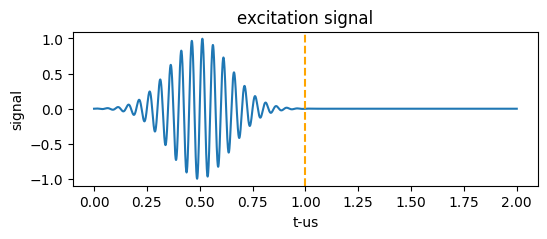

In [74]:
# plot excitation signal
t0 = 1 # us
n0 = int(t0/dt)
xf = xs[1] # um
mf = int(xf/dx)
xr = xs[0] # ums
mr = int(xr/dx)
hf = xf - xr

d33 = 1
e33 = 1
ff = np.zeros_like(dd)
ff[xr] = -d33*dx/(2*hf)
ff[xf] = d33*dx/(2*hf)
ff *= (r*r).reshape(dd.shape)

freq = 20 # MHz
def f(t):
    return np.exp(-(t-t0/2)**2/(0.2*t0)**2)*np.sin(2*np.pi*freq*t)
#     return np.exp(-(t-t0/2)**2/(0.1*t0)**2)

exc_sig = f(tgrid)
fig = plt.figure(figsize=[6,2])
plt.plot(tgrid, exc_sig)
plt.axvline(x=t0, color='orange', linestyle='--')
plt.xlabel('t-us')
plt.ylabel('signal')
plt.title('excitation signal')
plt.show()

In [75]:
# core finite different algorithm
# assume both \epsilon_33 = 1
def get_next(u_curr, u_prev, n):
    # n = index of u_curr
    u_next = K@u_curr - dd*u_prev + ff*exc_sig[n]
    return u_next

def wave_1d(u_ini):
    u_prev = u_ini
    u_curr = u_ini
    
    U = []
    U.append(u_prev)
    U.append(u_curr)
    for n in range(1, Nt):
        u_next = get_next(u_curr, u_prev, n)
        u_prev = u_curr
        u_curr = u_next
        
        U.append(u_next)
    
    U = np.concatenate(U, axis=1)
    ur = (U[mf, :] - U[mr, :])*e33
    
    return U, ur

In [76]:
# solve wave 1d
u_ini = np.zeros((Nx+1, 1)) # column vector

U, ur = wave_1d(u_ini)

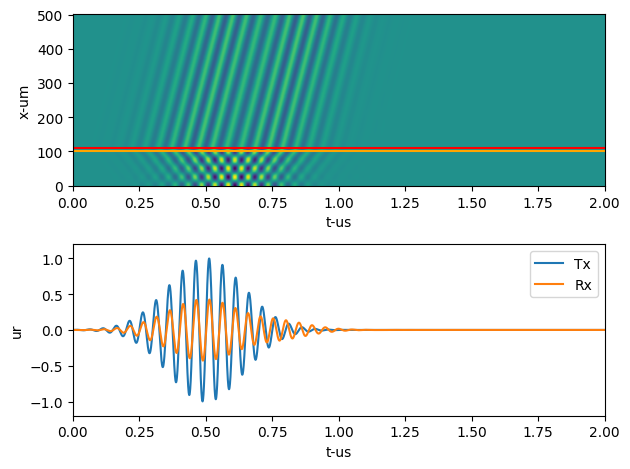

In [77]:
# visualize results
fig, ax = plt.subplots(2)
xx,tt = np.meshgrid(xgrid, tgrid, indexing='ij')
ax[0].pcolormesh(tt,xx,U)
ax[0].axhline(y=xf, color='r', linestyle='-')
ax[0].axhline(y=xr, color='orange', linestyle='-')
ax[0].set_xlabel('t-us')
ax[0].set_ylabel('x-um')

ax[1].plot(tgrid, exc_sig, label='Tx')
ax[1].plot(tgrid, ur, label='Rx')
ax[1].set_xlabel('t-us')
ax[1].set_ylabel('ur')
ax[1].margins(x=0.0, y=0.1)
ax[1].legend()
fig.tight_layout()

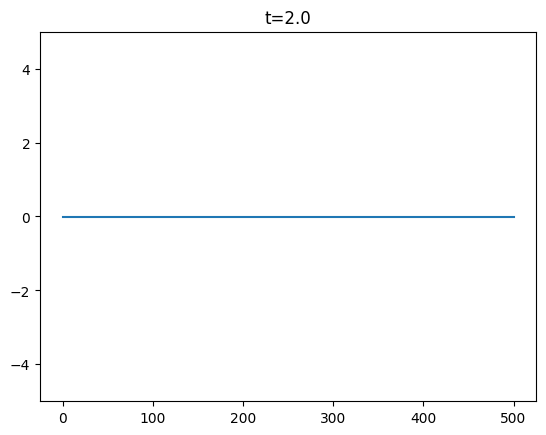

In [19]:
# wave propagation in spacextime
import time
from IPython import display

for i in range(0,Nt+1, 50):
    try:
        display.clear_output(wait=True)
        plt.plot(xgrid, U[:, i])
        plt.ylim((-5, 5))
        plt.title(f't={tgrid[i]}')
        plt.show()
    except KeyboardInterrupt:
        break

### Validation
We use method of lines (MOL) to validate the above solution. Descretizing ONLY the space with step of 
$\Delta x$, then the second-order derivative w.r.t $x$ is expressed as:
$$\frac{d^2u_m(t)}{dt^2} = \frac{E_m}{\rho_m} \frac{u^n_{m-1}(t) - 2u^{n}_m(t) + u^n_{m+1}(t)}{\Delta x^2} + \frac{-E_{m-1} + E_{m+1}}{\rho_m} \frac{-u^n_{m-1}(t) + u^n_{m+1}(t)}{4\Delta x^2} - d_{33} \frac{E_m}{\rho_m} \frac{-\mathscr{E}_{m-1}(t) + \mathscr{E}_{m+1}(t)}{2\Delta x}$$
plus:
Free boundary condition at $x=0$: $u_{0}(t)=u_1(t)$; <br/>
Absorbing boundary condition at $x=L$: $du_M(t)/dt= c(u^n_{M-1} - u^n_{M})/\Delta x $; <br/>

For speeding up computation, we want to express the above equations in Matrix formula:
$$\frac{d^2 \mathbf{u}(t)}{d t^2} = \mathbf{Ku}(t)+\mathbf{g}(t), \frac{d \mathbf{u}(0)}{d t} = \mathbf{0}, \mathbf{u}(0)=\mathbf{0}$$

where $\mathbf{u}(t)=[u_0(t), u_1(t), u_2(t), \cdots, u_M(t)]^T$, $\mathbf{g}(t)=[0,0,\cdots,0,p_1(t),0,\cdots,0,p_2(t),\cdots,0,\cdots,0]^T$, and

$$ \mathbf{K} =  \frac{1}{\Delta x^2} \begin{bmatrix}
c_1^2-\frac{-c_0+c_2}{4}c_1 & -2c_1^2 & c_1^2+\frac{-c_0+c_2}{4}c_1  &  & &\\
c_1^2-\frac{-c_0+c_2}{4}c_1 & -2c_1^2 & c_1^2+\frac{-c_0+c_2}{4}c_1 &  & &\\
& c_2^2-\frac{-c_1+c_3}{4}c_2   & -2c_2^2 & c_2^2+\frac{-c_1+c_3}{4}c_2 &  &\\
& & \ddots & \ddots & \ddots & \\
& & & c_{M-1}^2-\frac{-c_{M-2}+c_M}{4}c_{M-1} & -2c_{M-1}^2 & c_{M-1}^2+\frac{-c_{M-2}+c_M}{4}c_{M-1} \\
& & &  &  c_M\Delta x & -c_M\Delta x
\end{bmatrix}
$$
and
$$p_1(t) = -d_{33} c_{m} \frac{V(t)}{\epsilon_{33} h_p} \frac{1}{2\Delta x}$$ when $m=f_1$ <br/>
$$p_2(t) = d_{33} c_{m} \frac{V(t)}{\epsilon_{33} h_p} \frac{1}{2\Delta x}$$ when $m=f_2$ <br/>

To reduce the order of derivation, let $\mathbf{v}(t)=d \mathbf{u}(t)/d t$, then:
$$\frac{\mathbf{v}(t)}{dt}=\mathbf{Ku}(t), \mathbf{v}(t)=0$$
Let $\mathbf{w}(t) = [\mathbf{u}(t), \mathbf{v}(t)]^T$, reformulate all equations and initial conditions as
$$\frac{d \mathbf{w}(t)}{d t} = \mathbf{Hw}(t) + \mathbf{q}(t), \mathbf{q}(t)=[\mathbf{0}^T, \mathbf{g}^T]^T, \mathbf{w}(0) = [\mathbf{0}^T, \mathbf{0}^T]^T$$
where
$$\mathbf{H} = \begin{bmatrix}
\mathbf{0} & \mathbf{I}\\
\mathbf{K} & \mathbf{0}
\end{bmatrix}
$$

In [78]:
from scipy.integrate import odeint

In [80]:
v2 = cgrid*cgrid*1.0
v2[0], v2[-1] = 0, 0

v1 = cgrid[1:]*cgrid[1:]*1.0
v1[0:-1] -= 0.25*(-cgrid[:-2]+cgrid[2:])*cgrid[1:-1]
v1[-1] = 0

v3 = cgrid[:-1]*cgrid[:-1]*1.0
v3[1:] += 0.25*(-cgrid[:-2]+cgrid[2:])*cgrid[1:-1]
v3[0] = 0

K = np.diag(v2) + np.diag(v1,k=-1) + np.diag(v3,k=1)
K[0,0] = v1[0]
K[0,1] = v2[1]
K[0,2] = v3[1]
K[-1,-2] = cgrid[-1]*dx
K[-1,-1] = -cgrid[-1]*dx
K /= dx^2
print("K = \n",K) # check whether K is right

K = 
 [[ 3.33333333e+05  3.33333333e+05  3.33333333e+05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.33333333e+05  3.33333333e+05  3.33333333e+05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.33333333e+05  3.33333333e+05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.00000000e+06
   3.00000000e+06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.00000000e+06
   3.00000000e+06  3.00000000e+06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.00000000e+03 -1.00000000e+03]]


In [81]:
I = np.eye(Nx+1)
N = np.zeros([Nx+1]*2)
H = np.block([[N, I],[K, N]])
print("H = \n", H)

H = 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [82]:
q = np.zeros(((Nx+1)*2,))

# solve wave 1d
def get_dydt(y,t):
    q[Nx+1+xr] = -d33*cgrid[xr]*f(t)/(2*dx*hf)
    q[Nx+1+xf] = d33*cgrid[xf]*f(t)/(2*dx*hf)
    dydt = np.dot(H, y) + q
    return dydt 

u_ini = np.zeros((Nx+1,))
v_ini = np.zeros((Nx+1,))

w_ini = np.concatenate([u_ini, v_ini])

sol = odeint(get_dydt, w_ini, tgrid)

 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.2407224363531D+00   r2 =                  NaN


In [86]:
U_val = sol[:, :Nx+1].T
ur_val = (U[mf, :] - U[mr, :])*e33

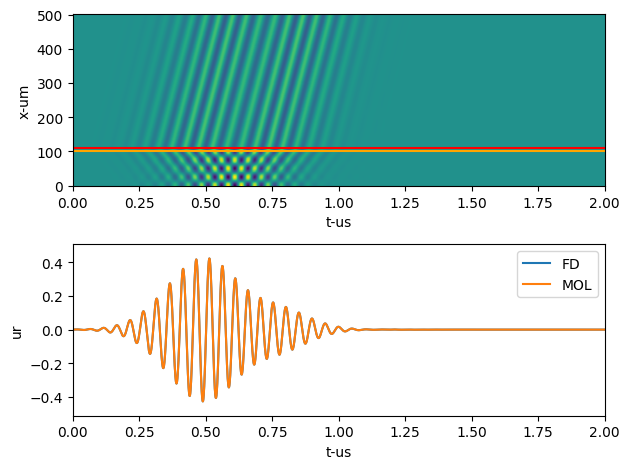

In [87]:
# visualize results
fig, ax = plt.subplots(2)
xx,tt = np.meshgrid(xgrid, tgrid, indexing='ij')
ax[0].pcolormesh(tt,xx,U)
ax[0].axhline(y=xf, color='r', linestyle='-')
ax[0].axhline(y=xr, color='orange', linestyle='-')
ax[0].set_xlabel('t-us')
ax[0].set_ylabel('x-um')

ax[1].plot(tgrid, ur, label='FD')
ax[1].plot(tgrid, ur_val, label='MOL')
ax[1].set_xlabel('t-us')
ax[1].set_ylabel('ur')
ax[1].margins(x=0.0, y=0.1)
ax[1].legend()
fig.tight_layout()

The FD solution is validated by MOL